<a href="https://colab.research.google.com/github/eldhosejoseph/thesis/blob/main/thesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

word link: https://essexuniversity-my.sharepoint.com/:w:/r/personal/ej23373_essex_ac_uk/_layouts/15/doc2.aspx?sourcedoc=%7B662A4E77-C405-427C-B638-3BE77C26C15D%7D&file=Datasets.docx&action=default&mobileredirect=true&DefaultItemOpen=1&ct=1716458088490&wdOrigin=OFFICECOM-WEB.MAIN.REC&cid=0d27486e-018b-4bd5-9607-f62c8b155336&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=f2e85dc2-29a6-4d10-932d-14c7c8a07a5c

====================Open Neuro===================================

https://openneuro.org/datasets/ds004511/versions/1.0.2

git: https://github.com/OpenNeuroDatasets/ds004511.git

====================Dryad========================================= [Data from: A novel algorithm to enhance P300 in single trials: application to lie detection using F-score and SVM] : https://datadryad.org/stash/dataset/doi:10.5061/dryad.2qc64

paper: https://doi.org/10.1371/journal.pone.0109700

=======An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior============================

Paper: https://www.nature.com/articles/s41597-024-03234-y :An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior

Dataset: https://figshare.com/articles/dataset/An_EEG_Dataset_of_Neural_Signatures_in_a_Competitive_Two-Player_Game_Encouraging_Deceptive_Behavior/24760827/3

git: https://github.com/yiyuchen-lab/DeceptionGame

==========LieWaves: dataset for lie detection based on EEG signals and wavelets===

Paper: https://link.springer.com/article/10.1007/s11517-024-03021-2 : LieWaves: dataset for lie detection based on EEG signals and wavelets

Dataset: [https://data.mendeley.com/datasets/5gzxb2bzs2/2]

## Libraries and Packages

In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.3 MB/s eta 0:00:00


In [2]:
import mne
import os
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Competitive Two Player Game- Deception Task

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Path to the .mat file within a folder in Google Drive
mat_file_path = '/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/Preprocessed/Preprocessed/DecisionMaking/Player_sub01_Observer_sub02.mat'

# Load the .mat file
mat_contents = loadmat(mat_file_path)

In [17]:
# Print the content keys
print("Keys in the .mat file:", mat_contents.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'observer', 'player'])


In [6]:
# Print the keys and their corresponding values
for key in mat_contents:
    print(key, mat_contents[key])

__header__ b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 20 12:39:53 2020'
__version__ 1.0
__globals__ []
observer [[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
            0.2064213 , -1.19021237],
          [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
           -2.85086083, -3.78615451],
          [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
            0.91994894, -5.00700808],
          ...,
          [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
            2.02332449,  3.43227458],
          [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
            1.84405303,  1.1173979 ],
          [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
           -0.79820997, -1.3509593 ]],

         [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
            4.99834871,  3.29911351],
          [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
            

In [18]:
mat_contents['observer']

array([[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
                  0.2064213 , -1.19021237],
                [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
                 -2.85086083, -3.78615451],
                [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
                  0.91994894, -5.00700808],
                ...,
                [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
                  2.02332449,  3.43227458],
                [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
                  1.84405303,  1.1173979 ],
                [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
                 -0.79820997, -1.3509593 ]],

               [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
                  4.99834871,  3.29911351],
                [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
                  1.41069198,  2.57719851],
   

In [ ]:
mat_contents['player']

In [21]:
observer_data=mat_contents['observer']
player_data=mat_contents['player']

In [32]:
#function to extract relevant eeg data
def eeg_data(data_arrays):
  # Flatten or reshape each sub-array as needed
  # Example: Extracting the EEG data and timestamps
  eeg_data = data_arrays[1]
  timestamps = data_arrays[5]

  # Create a DataFrame with the flattened data
  data_df = pd.DataFrame({
      'EEG_data': [eeg_data],
      'Timestamps': [timestamps]
  })
  return data_df
  # Display the DataFrame
  #print(data_df)

In [41]:
eeg_data(observer_data[0][0])

,EEG_data,Timestamps
0,"[[[11.73809814453125, -4.603399276733398, 4.17...","[[-500, -490, -480, -470, -460, -450, -440, -4..."


In [36]:
eeg_data(player_data[0][0])

,EEG_data,Timestamps
0,"[[[-7.187648296356201, 1.2291985750198364, 1.8...","[[-500, -490, -480, -470, -460, -450, -440, -4..."


In [42]:
#eeg heatmap

def eeg_heatmap(eeg_df):
  """

  Args:
    eeg_df:
  """
  # Extract EEG data and timestamps
  eeg_data = eeg_df.iloc[0][0]
  timestamps = eeg_df.iloc[0][1]

  # Reshape timestamps to match the shape of EEG data
  timestamps = np.squeeze(timestamps)

  # Plot EEG data
  plt.figure(figsize=(10, 6))
  plt.imshow(eeg_data[:, :, 0], aspect='auto', cmap='jet', extent=[timestamps[0], timestamps[-1], 0, 30])
  plt.colorbar(label='Amplitude')
  plt.xlabel('Time (ms)')
  plt.ylabel('Channel')
  plt.title('EEG Data')
  plt.show()

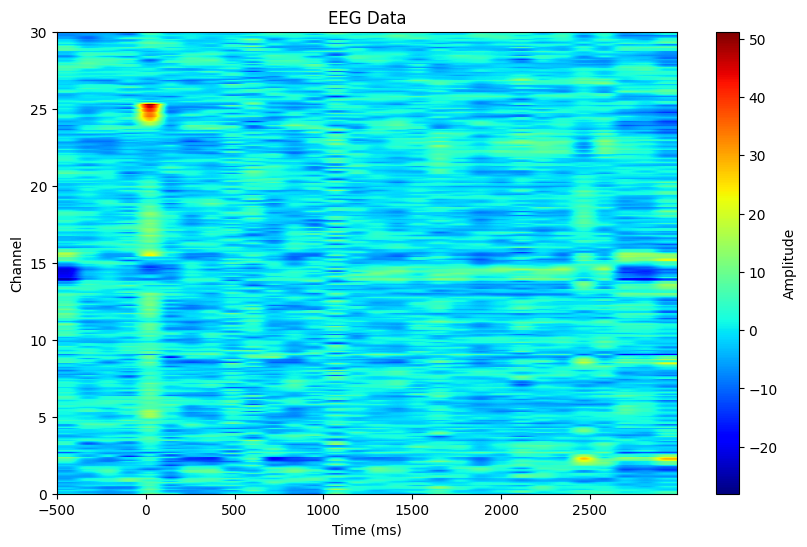

In [46]:
player_df=eeg_data(player_data[0][0])

eeg_heatmap(player_df)

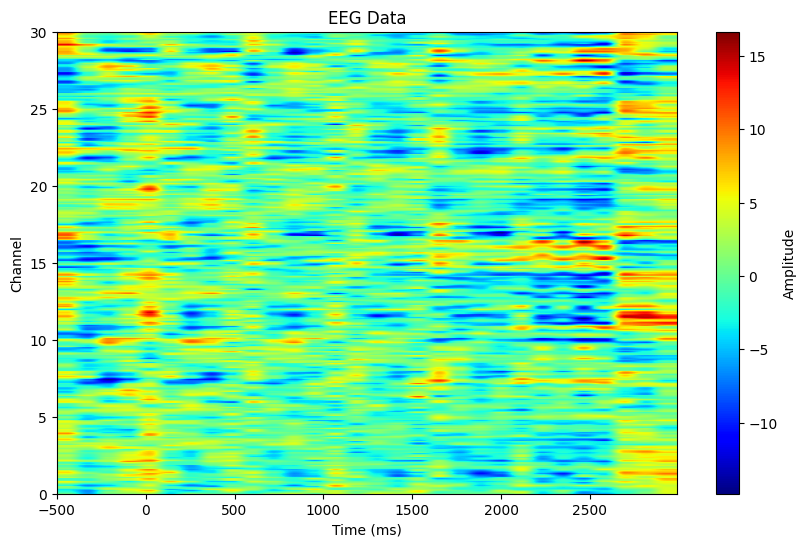

In [45]:
observer_df=eeg_data(observer_data[0][0])

eeg_heatmap(observer_df)

In [47]:


def eeg_channel(eeg_df, num_channels):
    # Extract EEG data and timestamps
    eeg_data = eeg_df.iloc[0][0]
    timestamps = eeg_df.iloc[0][1]

    # Reshape timestamps to match the shape of EEG data
    timestamps = np.squeeze(timestamps)

    # Plot EEG data for each channel separately
    num_channels = eeg_data.shape[1]
    plt.figure(figsize=(30, 15))

    for channel_idx in range(num_channels):
        plt.subplot(num_channels, 1, channel_idx + 1)
        plt.plot(timestamps, eeg_data[:, channel_idx, 0], color='b', linewidth=1)
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
        plt.title(f'Channel {channel_idx + 1}')

    plt.tight_layout()
    plt.show()

In [ ]:
eeg_channel(player_df)

In [ ]:
eeg_channel(observer_df)